In [ ]:
import nltk, re, numpy
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import files
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
files.upload()
!ls

Saving text3.txt to text3.txt
sample_data  text1.txt	text2.txt  text3.txt


In [ ]:
text = []
for t in ['text1.txt','text2.txt','text3.txt']:
  f = open(t)
  text.append(f.read().replace("\n", ""))
  f.close()

In [ ]:
def clean_review(review):
    word_count = []
    review = re.sub("[^A-Za-z]", " ", review)
    review = review.lower()
    review = nltk.tokenize.word_tokenize(review)
    word_count.append(len(review))
    word_count.append(len(numpy.unique(review)))
    review = [word for word in review if not word in nltk.corpus.stopwords.words("english")]
    word_count.append(len(review))
    word_count.append(len(numpy.unique(review)))
    stemmer = nltk.stem.porter.PorterStemmer()
    review = [stemmer.stem(word) for word in review]
    word_count.append(len(review))
    word_count.append(len(numpy.unique(review)))
    return [review, word_count]

In [ ]:
review = []
for i in text:
  review.append(clean_review(i))
print(review[0][0])
print(review[0][1]) # 0, 2, 4 - все значения; 1, 3, 5 - уникальные значения
print(review[1][0])
print(review[1][1])
print(review[2][0])
print(review[2][1])

['special', 'pleasur', 'see', 'thing', 'eaten', 'see', 'thing', 'blacken', 'chang', 'brass', 'nozzl', 'fist', 'great', 'python', 'spit', 'venom', 'kerosen', 'upon', 'world', 'blood', 'pound', 'head', 'hand', 'hand', 'amaz', 'conductor', 'play', 'symphoni', 'blaze', 'burn', 'bring', 'tatter', 'charcoal', 'ruin', 'histori', 'symbol', 'helmet', 'number', 'stolid', 'head', 'eye', 'orang', 'flame', 'thought', 'came', 'next', 'flick', 'ignit', 'hous', 'jump', 'gorg', 'fire', 'burn', 'even', 'sky', 'red', 'yellow', 'black', 'strode', 'swarm', 'firefli', 'want', 'like', 'old', 'joke', 'shove', 'marshmallow', 'stick', 'furnac', 'flap', 'pigeon', 'wing', 'book', 'die', 'porch', 'lawn', 'hous', 'book', 'went', 'sparkl', 'whirl', 'blew', 'away', 'wind', 'turn', 'dark', 'burn', 'montag', 'grin', 'fierc', 'grin', 'men', 'sing', 'driven', 'back', 'flame', 'knew', 'return', 'firehous', 'might', 'wink', 'minstrel', 'man', 'burnt', 'cork', 'mirror', 'later', 'go', 'sleep', 'would', 'feel', 'fieri', 'smi

In [ ]:
def clean_xy(review):
  c = Counter(review).most_common()
  x = numpy.arange(len(c)); y = []; r = []
  max = c[0][1]
  for i in c:
    y.append(i[1]/(len(x)))
    r.append(i[1])
  print(c[0][1],'-', i[1])
  return [x, y, r]

4 - 1
['pleasur', 'see', 'thing', 'eaten', 'see', 'thing', 'blacken', 'chang', 'brass', 'nozzl', 'fist', 'great', 'python', 'spit', 'venom', 'kerosen', 'upon', 'world', 'blood', 'pound', 'head', 'hand', 'hand', 'amaz', 'conductor', 'play', 'symphoni', 'blaze', 'burn', 'bring', 'tatter', 'charcoal', 'ruin']
0.08716418638056521
[4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8 - 1
['went', 'open', 'door', 'montag', 'watch', 'window', 'beatti', 'drove', 'away', 'gleam', 'yellow', 'flame', 'col

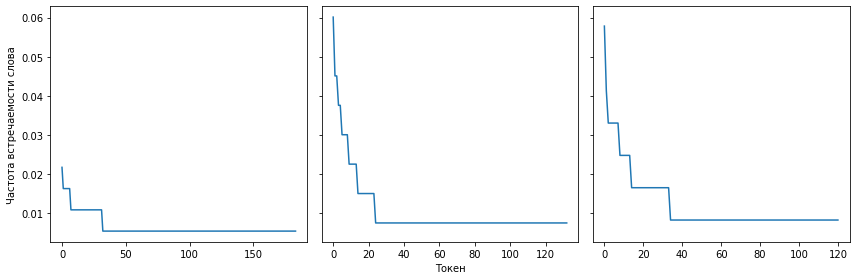

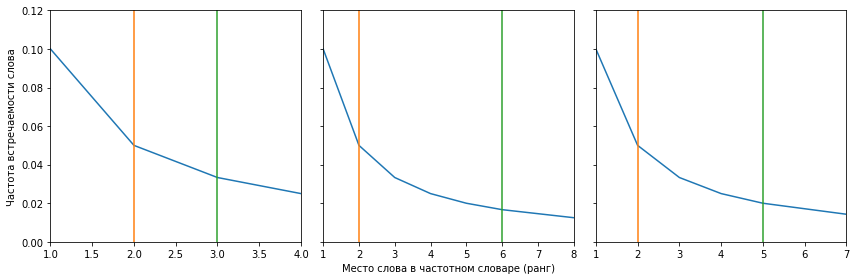

In [ ]:
plt.rcParams['figure.figsize'] = [12, 4]
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
fig, axs2 = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs2[1].set_xlabel('Место слова в частотном словаре (ранг)')
axs2[0].set_ylabel('Частота встречаемости слова')
axs[1].set_xlabel('Токен')
axs[0].set_ylabel('Частота встречаемости слова')
for i in range(3):
  x, y, r = clean_xy(review[i][0])
  print(review[i][0][1:34]) # для вывода промежутка токенов (значимого диапазона) 1 - начало, 34 конец, например, для второго текста массиву повторений слов [8, 6, 6, 5, 5, ...]
                            # соответствует следующие ранги [1, 2, 2, 3, 3, ...], для выбора слов начиная с 3-его ранга указываем начало равное 3 (3 элемент массива, если что)
  fy = [0.1/i for i in r]
  axs2[i].plot(r, fy)
  axs2[i].axis([1,r[0],0,0.12])
  axs2[i].plot([2, 2],[0, 0.12])
  if i == 0:
    axs2[i].plot([3, 3],[0, 0.12])
  elif i == 1:
    axs2[i].plot([6, 6],[0, 0.12])
  else:
    axs2[i].plot([5, 5],[0, 0.12])
  axs[i].plot(x, y)
  sum = 0; n = len(x)
  for i in range(n-1):
    sum+= (fy[i]-y[i])**2
  print((sum/(n-1))**0.5)
  print(r)